### Create a SQLite Database

This notebook demonstrates, how to create and work with SQLite database.
Below type of queries are executed in this notebook.
- Drop Table
- Create Table

#### Import the required packages

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

print("All required packages are imported successfully !")

All required packages are imported successfully !


#### Load the required extensions

To communicate with SQL Databases from a Jupyter notebook, we can use the SQL "magic" command provided by the ipython-sql extension. <code>%load_ext sql</code> is the magic command to load the ipython-sql extension. 

For SQLite Database, this magic is not needed.

#### Create connection to SQLite Database file


In [2]:
database = 'tds.sqlite'
conn = sqlite3.connect(database)

#### Create the Cursor



In [3]:
cur = conn.cursor()

#### Create the Table



In [ ]:
drop_table_query = "DROP TABLE IF EXISTS job"

create_table_query = "CREATE TABLE IF NOT EXISTS job(\
                        Year INTEGER, DipEngineer INTEGER,\
                        Medical INTEGER, Agriculture INTEGER,\
                        Science INTEGER, Engineer INTEGER,\
                        PGMedical INTEGER, PGAgriculture INTEGER,\
                        PGScience INTEGER)"
cur.execute(drop_table_query)
cur.execute(create_table_query)
conn.commit()

Let's quickly check if the required table is created in the database or not

In [ ]:
check_table_cols = "SELECT * FROM job"
cur.execute(check_table_cols)
col_name_list = [tuple[0] for tuple in cur.description]
col_name_list

Yess!! All the required columns are created !

### Read the data from the Excel File

#### 1. Extract

In [8]:
df = pd.read_excel("jobseekers.xls", header=0) 
df.columns = ["Year", "DipEngineer", "Medical", "Agriculture",\
              "Veterinary", "Science","Engineer",\
              "GradTotal", "PGMedical","PGAgriculture",\
              "PGVeterinary", "PGScience", "PGTotal"]
df.head(10)

,Year,DipEngineer,Medical,Agriculture,Veterinary,Science,Engineer,GradTotal,PGMedical,PGAgriculture,PGVeterinary,PGScience,PGTotal
0,1971,54056.0,3848,7325,361,99189,19050,129773,105.0,682.0,31.0,10114.0,10932.0
1,1972,59847.0,5127,9092,200,160644,22808,197871,128.0,810.0,7.0,13642.0,14587.0
2,1973,55215.0,5664,8913,371,210716,23093,248757,184.0,959.0,19.0,16036.0,17198.0
3,1974,53901.0,6682,7370,376,215089,19344,248861,238.0,775.0,11.0,17565.0,18589.0
4,1975,55564.0,7301,7958,511,237607,17316,270693,422.0,887.0,4.0,19374.0,20687.0
5,1976,62447.0,8249,8285,489,241319,18385,276727,321.0,911.0,13.0,24557.0,25802.0
6,1977,74319.0,8948,9763,299,265656,19798,304464,385.0,1064.0,46.0,25529.0,27024.0
7,1978,84317.0,10637,9765,399,281693,20113,322607,627.0,871.0,25.0,25751.0,27274.0
8,1979,87275.0,12923,10841,433,286639,21781,332617,924.0,850.0,35.0,25788.0,27597.0
9,1980,90306.0,14809,11375,356,310692,21862,359094,1836.0,546.0,66.0,25651.0,28099.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           36 non-null     int64  
 1   DipEngineer    33 non-null     float64
 2   Medical        36 non-null     int64  
 3   Agriculture    36 non-null     int64  
 4   Veterinary     36 non-null     int64  
 5   Science        36 non-null     int64  
 6   Engineer       36 non-null     int64  
 7   GradTotal      36 non-null     int64  
 8   PGMedical      27 non-null     float64
 9   PGAgriculture  27 non-null     float64
 10  PGVeterinary   26 non-null     float64
 11  PGScience      27 non-null     float64
 12  PGTotal        27 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 3.8 KB


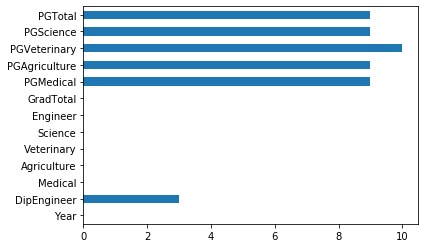

In [12]:
df.isna().sum().plot(kind='barh')

Looks like, there are few null values in the last 5 columns. Just for simplicity, let's remove the rows containing these null values.

#### 2. Transform

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 27
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           26 non-null     int64  
 1   DipEngineer    26 non-null     float64
 2   Medical        26 non-null     int64  
 3   Agriculture    26 non-null     int64  
 4   Veterinary     26 non-null     int64  
 5   Science        26 non-null     int64  
 6   Engineer       26 non-null     int64  
 7   GradTotal      26 non-null     int64  
 8   PGMedical      26 non-null     float64
 9   PGAgriculture  26 non-null     float64
 10  PGVeterinary   26 non-null     float64
 11  PGScience      26 non-null     float64
 12  PGTotal        26 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 2.8 KB


Changing the data types of all the columns to int64

In [5]:
colnames = ["DipEngineer", "PGMedical", "PGAgriculture",\
            "PGVeterinary", "PGScience", "PGTotal"]
for col in colnames:
    df[col] = df[col].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 27
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           26 non-null     int64
 1   DipEngineer    26 non-null     int64
 2   Medical        26 non-null     int64
 3   Agriculture    26 non-null     int64
 4   Veterinary     26 non-null     int64
 5   Science        26 non-null     int64
 6   Engineer       26 non-null     int64
 7   GradTotal      26 non-null     int64
 8   PGMedical      26 non-null     int64
 9   PGAgriculture  26 non-null     int64
 10  PGVeterinary   26 non-null     int64
 11  PGScience      26 non-null     int64
 12  PGTotal        26 non-null     int64
dtypes: int64(13)
memory usage: 2.8 KB


selecting subset of this dataframe for storing in SQLite database

In [6]:
subdf = df [["Year", "DipEngineer", "Medical",\
             "Agriculture","Science", "Engineer",\
             "PGMedical", "PGAgriculture", "PGScience"]]
subdf.head(10)

,Year,DipEngineer,Medical,Agriculture,Science,Engineer,PGMedical,PGAgriculture,PGScience
0,1971,54056,3848,7325,99189,19050,105,682,10114
1,1972,59847,5127,9092,160644,22808,128,810,13642
2,1973,55215,5664,8913,210716,23093,184,959,16036
3,1974,53901,6682,7370,215089,19344,238,775,17565
4,1975,55564,7301,7958,237607,17316,422,887,19374
5,1976,62447,8249,8285,241319,18385,321,911,24557
6,1977,74319,8948,9763,265656,19798,385,1064,25529
7,1978,84317,10637,9765,281693,20113,627,871,25751
8,1979,87275,12923,10841,286639,21781,924,850,25788
9,1980,90306,14809,11375,310692,21862,1836,546,25651


#### 3. Load

Next step is to load this data in SQLite database

### Load the Data in SQLite Database

In [ ]:
subdf.to_sql('job', conn, if_exists="append", index=False)
print("Data Successfully exported !")

In [4]:
query = "SELECT Year, Medical, PGMedical FROM job"
cur.execute(query)
conn.commit()
result = cur.fetchall()
resultdf = pd.DataFrame(result)
resultdf.columns = [tuple[0] for tuple in cur.description]
resultdf.head()

,Year,Medical,PGMedical
0,1971,3848,105
1,1972,5127,128
2,1973,5664,184
3,1974,6682,238
4,1975,7301,422


Got it ! The Expected Output !

-------------------------------------------------------------------------------------

So, the data is successfully entered in the SQLite Database

Enjoy the SQL Queries!!!

Once finished, close the connection to the database as shown in the next cell.

----------------------------------------------------------------------------------------------

In [ ]:
conn.close()

### Thank you for your Time